# OpenCV - Yolo 적용
- 소스 : https://medium.com/@franky07724_57962/exploring-opencvs-deep-learning-object-detection-library-e51fe7c82246
- 모델 다운로드 : https://pjreddie.com/darknet/yolov2/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
classes_80 = ["person", "bicycle", "car", "motorcycle",
            "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant",
            "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
            "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
            "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis",
            "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
            "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife",
            "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog",
            "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table",
            "toilet", "tv", "laptop", "mouse", "remote", "keyboard",
            "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
            "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush" ]

In [4]:
config = 'yolov2.cfg'
model = 'yolov2.weights'

Net_YOLO = cv2.dnn.readNetFromDarknet(config, model)

In [5]:
def plot_detected_objects(image_path, threshold=0.1):
    image = plt.imread(image_path)

    Net_YOLO.setInput(cv2.dnn.blobFromImage(image, 1.0/255.0, (416, 416), swapRB = True, crop = False))

    Net_YOLO_pred = Net_YOLO.forward()
    #print(">>> YOLOv2 prediction shape = ", Net_YOLO_pred.shape)

    dpi = 60
    plt.figure(figsize=(image.shape[1]//dpi, image.shape[0]//dpi))
    plt.imshow(image)

    for i in range(Net_YOLO_pred.shape[0]):
        # get the confidence on the object
        confidence_on_box = Net_YOLO_pred[i][4]
        
        # find the class index with the highest probability
        probability_list = Net_YOLO_pred[i][5:]
        class_index = probability_list.argmax(axis=0)
        probability_on_class = probability_list[class_index]

        # get the score 
        score = confidence_on_box * probability_on_class

        # draw the bounding box
        if (score > threshold):
            print('%s(%d): score = %.2f%%' % (classes_80[class_index], class_index, score*100))
            
            x_center   = Net_YOLO_pred[i][0] * image.shape[1]
            y_center   = Net_YOLO_pred[i][1] * image.shape[0]
            width      = Net_YOLO_pred[i][2] * image.shape[1]
            height     = Net_YOLO_pred[i][3] * image.shape[0]

            left       = int(x_center - width * 0.5)
            top        = int(y_center - height * 0.5)
            right      = int(x_center + width * 0.5)
            bottom     = int(y_center + height * 0.5)

            plt.gca().add_patch(
                plt.Rectangle((int(left), int(top)),
                    width,
                    height,
                    linewidth=2, edgecolor='r', facecolor='none')
            )

car(2): score = 57.82%
person(0): score = 46.10%
person(0): score = 58.83%


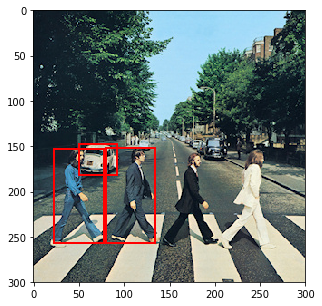

In [6]:
plot_detected_objects('abbey_road.jpg',0)